In [6]:
import pandas as pd 
import matplotlib as mpl
import numpy as np

# reading and storing data
data = pd.read_csv('credit_card_fraud.csv', parse_dates=['trans_date_trans_time',])


In [8]:
# getting rid of columns not needed
#data = data.drop(['trans_num'], axis = 1)

data['hour_of_transaction'] = data.trans_date_trans_time.dt.hour
data.tail()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour_of_transaction
339602,2020-12-31 23:57:56,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,65.623593,-165.186033,0,23
339603,2020-12-31 23:58:04,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20,41.973127,-123.553032,0,23
339604,2020-12-31 23:59:07,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13,39.946837,-91.333331,0,23
339605,2020-12-31 23:59:15,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,46.658340,-119.715054,0,23
339606,2020-12-31 23:59:24,Breitenberg LLC,travel,7.99,Mesa,ID,44.6255,-116.4493,129,Cartographer,1965-12-15,44.470525,-117.080888,0,23


From here we are showing some interesting data that we extracted from our dataset.
The data shown below can help us understand more about our data as well as help us pinpoint some factors that may be better than others in detecting fraud.

1. The number of Fraud purchases in each state
2. The percent of Fraud in each state
3. The number of Fraud purchases in each category of purchase
4. The percent of Fraud purchases in each category of purchase


Text(0, 0.5, 'Fraud Count')

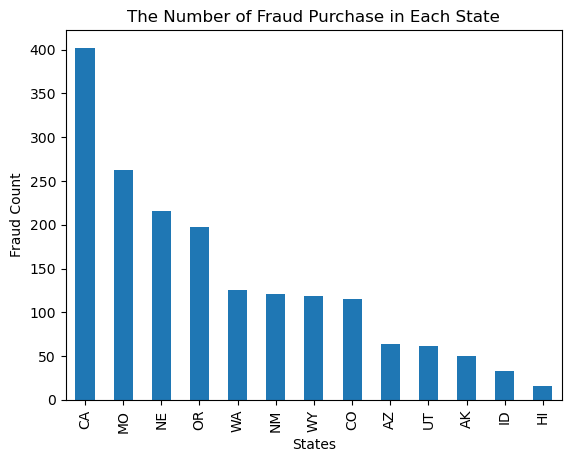

In [42]:
# States with the most fraud, and the percentage of fraud in those states
fraud_states = data.query('is_fraud==1')['state']
fraud_counts = fraud_states.value_counts()
fraud_counts_chart = fraud_counts.plot.bar(title='The Number of Fraud Purchase in Each State')
fraud_counts_chart.set_xlabel('States')
fraud_counts_chart.set_ylabel('Fraud Count')

Text(0, 0.5, 'Percent of Fraud')

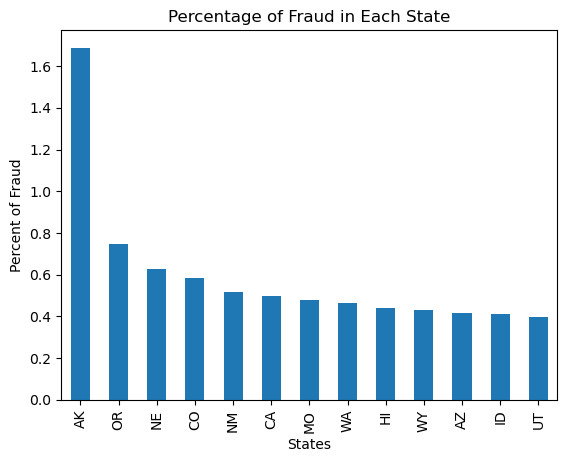

In [50]:
# percentage of fraud in each state
state_fraud_perc = (fraud_counts/data['state'].value_counts())*100
state_fraud_perc = state_fraud_perc.sort_values(ascending=False)
state_fraud_perc_chart = state_fraud_perc.plot.bar(title='Percentage of Fraud in Each State')
state_fraud_perc_chart.set_xlabel('States')
state_fraud_perc_chart.set_ylabel('Percent of Fraud')


Text(0, 0.5, 'Fraud Count')

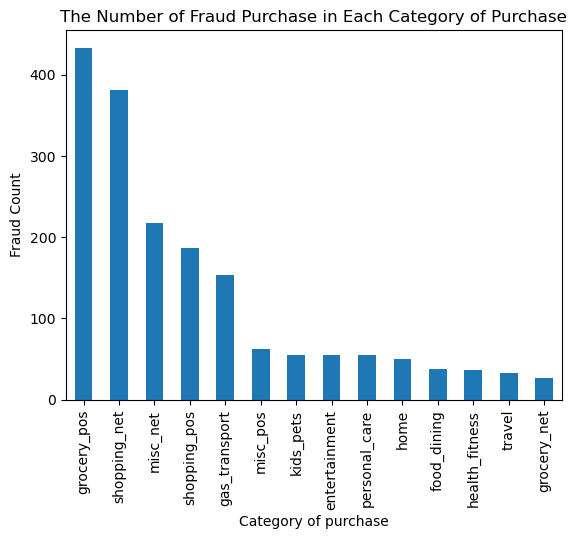

In [44]:
fraud_categories = data.query('is_fraud==1')['category']
fraud_categories = fraud_categories.value_counts()
fraud_categories_chart = fraud_categories.plot.bar(title='The Number of Fraud Purchase in Each Category of Purchase')
fraud_categories_chart.set_xlabel('Category of purchase')
fraud_categories_chart.set_ylabel('Fraud Count')

Text(0, 0.5, 'Percent of Fraud')

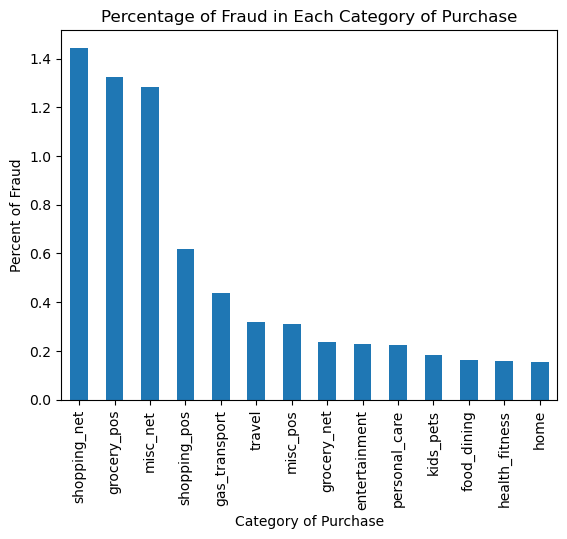

In [49]:
cat_fraud_perc = (fraud_categories/data['category'].value_counts())*100
cat_fraud_perc = cat_fraud_perc.sort_values(ascending=False)
cat_fraud_perc_chart = cat_fraud_perc.plot.bar(title='Percentage of Fraud in Each Category of Purchase')
cat_fraud_perc_chart.set_xlabel('Category of Purchase')
cat_fraud_perc_chart.set_ylabel('Percent of Fraud')